# Data exploration

 In this notebook, we will explore and preprocess the data. 
 
 1.Preprocess data and data exploration \
	(a) Encoding the feature into numerical value (e.g. date type) \
	(b) Data exploration about each feature. Might exclude highly correlated variables. \
	(c) Dealing with Missingness
			· Which variable treated as control? 
			· Which variables need to be imputed?
			· Which variable need to be discarded with high percentage of missingness

Outcome interstage_mortality


## Visualze Data

In [132]:
import pandas as pd
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
%matplotlib inline
import seaborn.apionly as sns
sns.set_context('talk')
# sns.set(style="darkgrid")

In [133]:
df = pd.read_csv('data/raw/Merged Data Complete.csv')
df.shape

(3267, 201)

In [134]:
# subject_deid is Unique patient identifier
len(df['subject_deid'].unique())

3267

In [135]:
df.describe()

,site_deid,subject_deid,fetal_diagnosis,fetal_intervention,fetalintervention_aov,fetalintervention_asd,fetalintervention_pm,fetalintervention_other,year,anomalies_cns,...,syndrome_any,anomalies_any,riskfactor_any,norwood_type,nutrition_route,gestational_age,s1comp_chylo,phase,s1comp_nec,anomalies_endo
count,3267.000000,3267.000000,3259.000000,3070.000000,3267.000000,3267.000000,3267.0,3267.000000,3267.000000,3267.000000,...,3267.000000,3267.000000,3267.000000,3260.000000,3255.000000,3241.000000,3267.000000,3267.000000,3267.000000,2059.000000
mean,32.671258,2226.237527,0.822031,0.013681,0.005816,0.002755,0.0,0.000612,2014.659014,0.014692,...,0.100704,0.076217,0.419651,1.979448,2.050384,38.493058,0.070401,1.369758,0.071319,0.010685
std,19.461575,1279.833597,0.382545,0.116181,0.076051,0.052422,0.0,0.024739,2.939591,0.120337,...,0.300982,0.265385,0.493577,1.019543,0.870139,1.515363,0.255861,0.482813,0.257397,0.102839
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2008.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,27.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,1126.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,2012.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,38.000000,0.000000,1.000000,0.000000,0.000000
50%,34.000000,2236.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,2015.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,39.000000,0.000000,1.000000,0.000000,0.000000
75%,46.000000,3327.500000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,2017.000000,0.000000,...,0.000000,0.000000,1.000000,2.000000,3.000000,39.000000,0.000000,2.000000,0.000000,0.000000
max,72.000000,4445.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,2019.000000,1.000000,...,1.000000,1.000000,1.000000,7.000000,3.000000,54.000000,1.000000,2.000000,1.000000,1.000000


In [136]:
df.head()

,site_deid,subject_deid,fetal_diagnosis,fetal_intervention,fetalintervention_aov,fetalintervention_asd,fetalintervention_pm,fetalintervention_other,year,anomalies_cns,...,syndrome_any,anomalies_any,riskfactor_any,norwood_type,nutrition_route,gestational_age,s1comp_chylo,phase,s1comp_nec,anomalies_endo
0,19,3,1.0,0.0,0,0,0,0,2016,0,...,1,0,0,2.0,3.0,39.0,0,2,0,NaN
1,41,15,1.0,0.0,0,0,0,0,2016,0,...,0,0,1,1.0,3.0,38.0,0,2,0,NaN
2,71,23,1.0,0.0,0,0,0,0,2019,0,...,0,0,0,3.0,3.0,30.0,0,2,0,NaN
3,13,24,1.0,0.0,0,0,0,0,2018,0,...,0,0,0,1.0,1.0,39.0,0,2,0,NaN
4,40,27,1.0,0.0,0,0,0,0,2016,0,...,0,0,1,2.0,1.0,36.0,0,2,0,NaN


<AxesSubplot:>

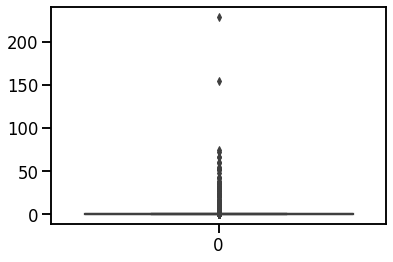

In [137]:
sns.boxplot(data=df['age_s1_admit'])

<AxesSubplot:xlabel='sex', ylabel='count'>

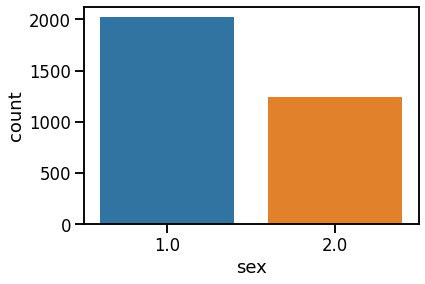

In [138]:
sns.countplot(data=df, x='sex')

<AxesSubplot:xlabel='race', ylabel='count'>

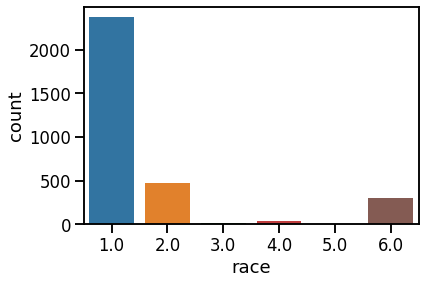

In [139]:
#  1 "White" 2 "Black" 3 "American Indian or Alaska Native" 4 "Asian" 5 "Native Hawaiian or Pacific Islander" 6 "Other"
sns.countplot(data=df, x='race')

<AxesSubplot:xlabel='ethnicity', ylabel='count'>

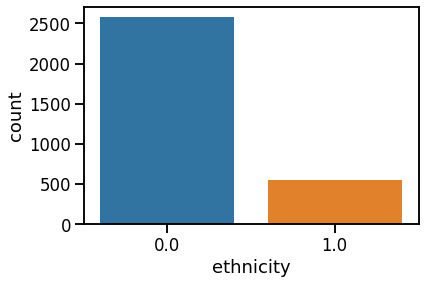

In [140]:
sns.countplot(data=df, x='ethnicity')

In [141]:
df[df['age_s1_admit']==0].shape

(2450, 201)

In [142]:
df['age_s1_admit'].mean()

1.23666978484565

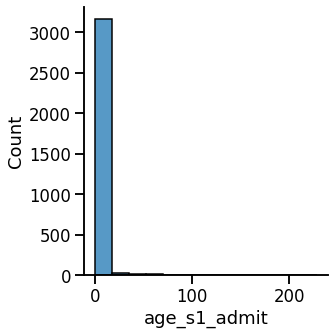

In [143]:
import numpy as np
sns.displot(df['age_s1_admit'])

<AxesSubplot:xlabel='phase', ylabel='count'>

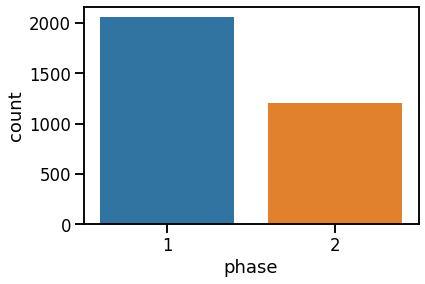

In [144]:
sns.countplot(x=df['phase'])

<AxesSubplot:xlabel='insurance', ylabel='count'>

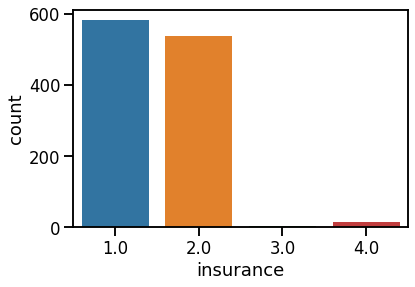

In [145]:
sns.countplot(x=df['insurance'])
# 1: Government, 2: Commercial, 3: Non-US, 4: None/Self Pay

outcome is interstage_mortality

<AxesSubplot:xlabel='interstage_mortality', ylabel='count'>

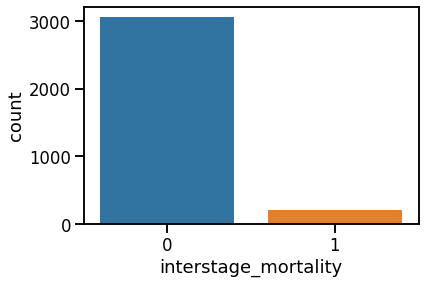

In [146]:
sns.countplot(x=df['interstage_mortality'])

<AxesSubplot:xlabel='race', ylabel='count'>

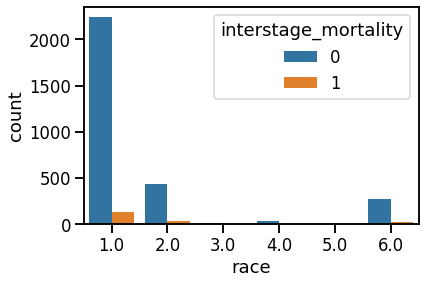

In [147]:
sns.countplot(x = df['race'], hue=df['interstage_mortality'])

<AxesSubplot:xlabel='insurance', ylabel='count'>

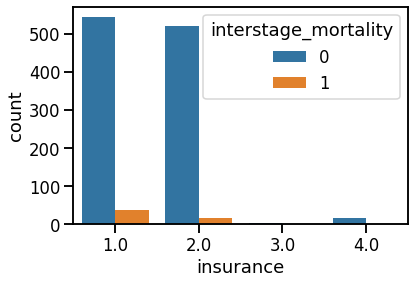

In [148]:
sns.countplot(x = df['insurance'], hue=df['interstage_mortality'])

<AxesSubplot:xlabel='interstage_mortality', ylabel='s1_cpbtime_min'>

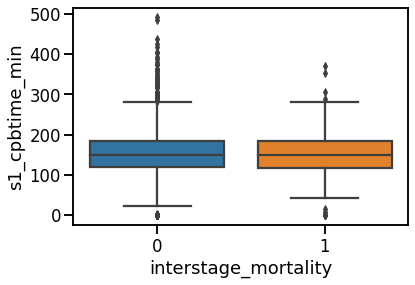

In [149]:
sns.boxplot(y = df['s1_cpbtime_min'], x=df['interstage_mortality'])

## Missing values

In [150]:
# check the missing percentage of each feature
sample_size = df.shape[0]
df_missing_rate = df.apply(lambda x: 1-x.count()/sample_size, axis=0)

In [151]:
# check the missing percentage of each feature
sample_size = df.shape[0]
df_missing_rate = df.apply(lambda x: 1-x.count()/sample_size, axis=0)
df_missing_rate.reset_index().to_csv('data/intermediate/missing_rate.csv', header=['feature', 'missing rate'], index=None)
# list features which missing percent larger than 40%
# columns_has_values[columns_has_values<=sample_size*0.6]
df_missing_rate[df_missing_rate>0.5]

insurance                  0.651362
add_dx_apvr                0.630242
add_dx_smallao             0.630242
add_dx_efe                 0.630242
s1_addproc_none            0.630242
s1_addproc_avvr            0.630242
s1_addproc_pulmv           0.630242
s1_addproc_other           0.630242
riskfactor_inotrope        0.630242
riskfactor_lactate         0.630242
riskfactor_shock           0.630242
s1_circ_arrest             0.630242
s1_xclamp                  0.630242
s1comp_stroke              0.630242
s1_cereperftime_min        0.809917
s1_additional_cpb          0.630242
s1_postop_cath_vvcoll      0.630242
s1_postop_cath_pdastent    0.630242
s1_postop_cath_other       0.630242
s1_otherproc_laryn         0.630242
s1dfeedeval_other          0.630242
amiodarone_at_dc           0.630242
mutivitamin_at_dc          0.630242
omeprazole_at_dc           0.630242
propranolol_at_dc          0.630242
sildenafil_at_dc           0.630242
s1d_neoarch_obs            0.721763
s1d_neo_ai                 0

In [152]:
# print("data shape", df.shape)
# remove_columns = list(df_missing_rate[df_missing_rate>0.4].index)
# print("Removing {} columns".format(len(remove_columns)))
# df_new = df.drop(remove_columns, axis=1)
# # df_new = df.copy()
# print("After, new data shape {}".format(df_new.shape))

# Preprocess the data

In [153]:
# shuffle the data
df = df.sample(frac=1,  random_state=100).reset_index(drop=True)
df.head()

,site_deid,subject_deid,fetal_diagnosis,fetal_intervention,fetalintervention_aov,fetalintervention_asd,fetalintervention_pm,fetalintervention_other,year,anomalies_cns,...,syndrome_any,anomalies_any,riskfactor_any,norwood_type,nutrition_route,gestational_age,s1comp_chylo,phase,s1comp_nec,anomalies_endo
0,5,2067,0.0,0.0,0,0,0,0,2014,0,...,0,0,1,3.0,1.0,38.0,0,1,0,0.0
1,4,1218,1.0,0.0,0,0,0,0,2012,0,...,0,0,0,2.0,2.0,37.0,0,1,0,0.0
2,34,3932,1.0,0.0,0,0,0,0,2019,0,...,0,0,0,2.0,3.0,39.0,0,2,0,NaN
3,34,441,NaN,NaN,0,0,0,0,2013,0,...,0,0,0,2.0,3.0,39.0,0,1,0,0.0
4,3,4400,1.0,0.0,0,0,0,0,2016,0,...,0,0,0,2.0,3.0,40.0,0,2,0,NaN


### remove missing value

In [154]:
# check the missing percentage of each feature
sample_size = df.shape[0]
df_missing_rate = df.apply(lambda x: 1-x.count()/sample_size, axis=0)
df_missing_rate.reset_index().to_csv('data/intermediate/missing_rate.csv', header=['feature', 'missing rate'], index=None)
# list features which missing percent larger than 40%
# columns_has_values[columns_has_values<=sample_size*0.6]
df_missing_rate[df_missing_rate>0.5]

insurance                  0.651362
add_dx_apvr                0.630242
add_dx_smallao             0.630242
add_dx_efe                 0.630242
s1_addproc_none            0.630242
s1_addproc_avvr            0.630242
s1_addproc_pulmv           0.630242
s1_addproc_other           0.630242
riskfactor_inotrope        0.630242
riskfactor_lactate         0.630242
riskfactor_shock           0.630242
s1_circ_arrest             0.630242
s1_xclamp                  0.630242
s1comp_stroke              0.630242
s1_cereperftime_min        0.809917
s1_additional_cpb          0.630242
s1_postop_cath_vvcoll      0.630242
s1_postop_cath_pdastent    0.630242
s1_postop_cath_other       0.630242
s1_otherproc_laryn         0.630242
s1dfeedeval_other          0.630242
amiodarone_at_dc           0.630242
mutivitamin_at_dc          0.630242
omeprazole_at_dc           0.630242
propranolol_at_dc          0.630242
sildenafil_at_dc           0.630242
s1d_neoarch_obs            0.721763
s1d_neo_ai                 0

In [155]:
def feature_prevalance(fea):
    overal_ratio = round(100*df[(df[fea]==1)].shape[0]/df.shape[0],2)
    
    case = df[df['interstage_mortality']==1]
    case_ratio = round(100*case[(case[fea]==1)].shape[0]/case.shape[0],2)
    
    control = df[df['interstage_mortality']==0]
    control_ratio = round(100*control[(control[fea]==1)].shape[0]/control.shape[0],2)
    
    print("overal {}: {}% ".format(fea, overal_ratio))
    print("control {}: {} %".format(fea, control_ratio))
    print("case {}: {} %".format(fea, case_ratio))

In [156]:
# plt.figure(figsize=(22, 22))
# sns_plot = sns.heatmap(df_new.corr(), cmap='coolwarm')
# fig = sns_plot.get_figure()
# # fig.savefig("figures/correlationPlot_with_missingness.png")

In [157]:
print("data shape", df.shape)
remove_columns = list(df_missing_rate[df_missing_rate>0.5].index)
print("Removing {} columns".format(len(remove_columns)))
df_new = df.drop(remove_columns, axis=1)
# df_new = df.copy()
print("After, new data shape {}".format(df_new.shape))

data shape (3267, 201)
Removing 31 columns
After, new data shape (3267, 170)


In [158]:
# df_new.rename({'interstage_mortality':'label'}, axis=1, inplace=True)

## change diagnosis value

In [159]:
#make other single ventricle 0; HLHS->1 
# df_new = df.copy()
df_new.loc[df_new['diagnosis']==2, 'diagnosis']=0
df_new['diagnosis'].sum()/df_new.shape[0]

0.6932966023875115

## add one-hot encoder for categoritical variable such as race

### race

In [160]:
y = pd.get_dummies(df_new.race, prefix='Race')
y.head()

,Race_1.0,Race_2.0,Race_3.0,Race_4.0,Race_5.0,Race_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0


In [161]:
y.sum()/y.shape[0]

Race_1.0    0.726354
Race_2.0    0.143251
Race_3.0    0.005816
Race_4.0    0.010713
Race_5.0    0.001224
Race_6.0    0.090909
dtype: float64

In [162]:
y['combined 3 and 5 and 6'] = (y['Race_3.0'] | y['Race_5.0'] | y['Race_6.0']).astype(int)

In [163]:
y.sum()/y.shape[0]

Race_1.0                  0.726354
Race_2.0                  0.143251
Race_3.0                  0.005816
Race_4.0                  0.010713
Race_5.0                  0.001224
Race_6.0                  0.090909
combined 3 and 5 and 6    0.097949
dtype: float64

In [164]:
y = y.drop(['Race_3.0', 'Race_5.0', 'Race_6.0'], axis=1)

In [165]:
y.rename(columns={'Race_1.0': 'Race_W','Race_2.0': 'Race_B','Race_4.0': 'Race_A', 'combined 3 and 5 and 6': 'Race_Others'}, inplace=True)

In [166]:
y.head()

,Race_W,Race_B,Race_A,Race_Others
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0


In [167]:
df_new = pd.concat([df_new, y], axis=1)
df_new.head()

,site_deid,subject_deid,fetal_diagnosis,fetal_intervention,fetalintervention_aov,fetalintervention_asd,fetalintervention_pm,fetalintervention_other,year,anomalies_cns,...,nutrition_route,gestational_age,s1comp_chylo,phase,s1comp_nec,anomalies_endo,Race_W,Race_B,Race_A,Race_Others
0,5,2067,0.0,0.0,0,0,0,0,2014,0,...,1.0,38.0,0,1,0,0.0,1,0,0,0
1,4,1218,1.0,0.0,0,0,0,0,2012,0,...,2.0,37.0,0,1,0,0.0,0,1,0,0
2,34,3932,1.0,0.0,0,0,0,0,2019,0,...,3.0,39.0,0,2,0,NaN,1,0,0,0
3,34,441,NaN,NaN,0,0,0,0,2013,0,...,3.0,39.0,0,1,0,0.0,1,0,0,0
4,3,4400,1.0,0.0,0,0,0,0,2016,0,...,3.0,40.0,0,2,0,NaN,0,1,0,0


In [168]:
df_new.drop(['race'], axis=1, inplace=True)

In [169]:
df_new.shape

(3267, 173)

### Norwood_type

In [170]:
#Norwood_type
df_new['norwood_type']

0       3.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
3262    2.0
3263    2.0
3264    7.0
3265    2.0
3266    1.0
Name: norwood_type, Length: 3267, dtype: float64

In [171]:
y_nt = pd.get_dummies(df_new.norwood_type, prefix='Norwood_type')
y_nt.sum()/y.shape[0]

Norwood_type_1.0    0.286807
Norwood_type_2.0    0.574227
Norwood_type_3.0    0.074380
Norwood_type_4.0    0.028160
Norwood_type_5.0    0.014386
Norwood_type_6.0    0.007040
Norwood_type_7.0    0.012856
dtype: float64

In [172]:
y_nt.rename(columns={'Norwood_type_1.0': 'Norwood_BT',
                     'Norwood_type_2.0': 'Norwood_Sano',
                     'Norwood_type_3.0': 'Norwood_Hybrid', 
                     'Norwood_type_4.0': 'Norwood_DKS_Shunt',
                     'Norwood_type_5.0': 'Norwood_DKS_Conduit',
                     'Norwood_type_6.0': 'Norwood_Central_Shunt',
                     'Norwood_type_7.0': 'Norwood_Other'
                    },          
            inplace=True)

In [173]:
## combine 1 & 4 Norwood_BT & Norwood_DKS_Shunt
y_nt['Norwood_BT_DKS_Shunt'] = (y_nt['Norwood_BT'] | y_nt['Norwood_DKS_Shunt']).astype(int)
## combine 2 & 5 Norwood_BT & Norwood_DKS_Shunt
y_nt['Norwood_Sano_DKS_Conduit'] = (y_nt['Norwood_Sano'] | y_nt['Norwood_DKS_Conduit']).astype(int)
## combine 3 & 6 & 7
# y_nt['Norwood_Hybrid_Central_Shunt_Other'] = (y_nt['Norwood_Hybrid'] | y_nt['Norwood_Central_Shunt'] | y_nt['Norwood_Other']).astype(int)

In [174]:
y_nt.sum()/y.shape[0]

Norwood_BT                  0.286807
Norwood_Sano                0.574227
Norwood_Hybrid              0.074380
Norwood_DKS_Shunt           0.028160
Norwood_DKS_Conduit         0.014386
Norwood_Central_Shunt       0.007040
Norwood_Other               0.012856
Norwood_BT_DKS_Shunt        0.314968
Norwood_Sano_DKS_Conduit    0.588613
dtype: float64

In [175]:
y_nt.drop(['Norwood_BT', 'Norwood_DKS_Shunt', 'Norwood_Sano', 'Norwood_DKS_Conduit'], axis=1, inplace=True)

In [176]:
df_new = pd.concat([df_new, y_nt], axis=1)
df_new.drop(['norwood_type'], axis=1, inplace=True)

In [177]:
df_new.head()

,site_deid,subject_deid,fetal_diagnosis,fetal_intervention,fetalintervention_aov,fetalintervention_asd,fetalintervention_pm,fetalintervention_other,year,anomalies_cns,...,anomalies_endo,Race_W,Race_B,Race_A,Race_Others,Norwood_Hybrid,Norwood_Central_Shunt,Norwood_Other,Norwood_BT_DKS_Shunt,Norwood_Sano_DKS_Conduit
0,5,2067,0.0,0.0,0,0,0,0,2014,0,...,0.0,1,0,0,0,1,0,0,0,0
1,4,1218,1.0,0.0,0,0,0,0,2012,0,...,0.0,0,1,0,0,0,0,0,0,1
2,34,3932,1.0,0.0,0,0,0,0,2019,0,...,NaN,1,0,0,0,0,0,0,0,1
3,34,441,NaN,NaN,0,0,0,0,2013,0,...,0.0,1,0,0,0,0,0,0,0,1
4,3,4400,1.0,0.0,0,0,0,0,2016,0,...,NaN,0,1,0,0,0,0,0,0,1


### follow up 

In [178]:
def catergorize_to_onehot(df, org_feature, new_columns={}):
    y = pd.get_dummies(df[org_feature], prefix=org_feature)
    print(y.sum()/y.shape[0])
    y.rename(columns=new_columns,inplace=True)
    df_new = pd.concat([df, y], axis=1)
    df_new.drop([org_feature], axis=1, inplace=True)
    return df_new

In [179]:
df_new = catergorize_to_onehot(df_new, 's1d_followup', {'s1d_followup_1.0': 's1d_followup_Surgical_Center',
                                                        's1d_followup_2.0': 's1d_followup_Outside_Center',
                                                         's1d_followup_3.0': 's1d_followup_comb',
                                                         's1d_followup_99.0': 's1d_followup_other'})

s1d_followup_1.0     0.699112
s1d_followup_2.0     0.133150
s1d_followup_3.0     0.158861
s1d_followup_99.0    0.005816
dtype: float64


In [180]:
df_new.head()

,site_deid,subject_deid,fetal_diagnosis,fetal_intervention,fetalintervention_aov,fetalintervention_asd,fetalintervention_pm,fetalintervention_other,year,anomalies_cns,...,Race_Others,Norwood_Hybrid,Norwood_Central_Shunt,Norwood_Other,Norwood_BT_DKS_Shunt,Norwood_Sano_DKS_Conduit,s1d_followup_Surgical_Center,s1d_followup_Outside_Center,s1d_followup_comb,s1d_followup_other
0,5,2067,0.0,0.0,0,0,0,0,2014,0,...,0,1,0,0,0,0,1,0,0,0
1,4,1218,1.0,0.0,0,0,0,0,2012,0,...,0,0,0,0,0,1,0,0,1,0
2,34,3932,1.0,0.0,0,0,0,0,2019,0,...,0,0,0,0,0,1,1,0,0,0
3,34,441,NaN,NaN,0,0,0,0,2013,0,...,0,0,0,0,0,1,1,0,0,0
4,3,4400,1.0,0.0,0,0,0,0,2016,0,...,0,0,0,0,0,1,1,0,0,0


In [181]:
df_new['s1d_followup_other'].sum()/df_new.shape[0]

0.0058157330884603614

### hlhs_type 


In [182]:
def add_missing_indicator(df, feature):
    df['{}_missing_indicator'.format(feature)] = np.where(df[feature].isnull(),1,0)
    return df
    

In [183]:
df_new = add_missing_indicator(df_new, 'hlhs_type')
df_new.head()

,site_deid,subject_deid,fetal_diagnosis,fetal_intervention,fetalintervention_aov,fetalintervention_asd,fetalintervention_pm,fetalintervention_other,year,anomalies_cns,...,Norwood_Hybrid,Norwood_Central_Shunt,Norwood_Other,Norwood_BT_DKS_Shunt,Norwood_Sano_DKS_Conduit,s1d_followup_Surgical_Center,s1d_followup_Outside_Center,s1d_followup_comb,s1d_followup_other,hlhs_type_missing_indicator
0,5,2067,0.0,0.0,0,0,0,0,2014,0,...,1,0,0,0,0,1,0,0,0,1
1,4,1218,1.0,0.0,0,0,0,0,2012,0,...,0,0,0,0,1,0,0,1,0,0
2,34,3932,1.0,0.0,0,0,0,0,2019,0,...,0,0,0,0,1,1,0,0,0,0
3,34,441,NaN,NaN,0,0,0,0,2013,0,...,0,0,0,0,1,1,0,0,0,0
4,3,4400,1.0,0.0,0,0,0,0,2016,0,...,0,0,0,0,1,1,0,0,0,1


In [184]:
df_new = catergorize_to_onehot(df_new, 'hlhs_type', {'hlhs_type_1.0': 'hlhs_type_MA_AA',
                                                        'hlhs_type_2.0': 'hlhs_type_MS_AA',
                                                         'hlhs_type_3.0': 'hlhs_type_MA_AS',
                                                         'hlhs_type_4.0': 'hlhs_type_MS_AS'})

hlhs_type_1.0    0.274564
hlhs_type_2.0    0.161616
hlhs_type_3.0    0.022345
hlhs_type_4.0    0.120294
dtype: float64


In [185]:
df_new.head()

,site_deid,subject_deid,fetal_diagnosis,fetal_intervention,fetalintervention_aov,fetalintervention_asd,fetalintervention_pm,fetalintervention_other,year,anomalies_cns,...,Norwood_Sano_DKS_Conduit,s1d_followup_Surgical_Center,s1d_followup_Outside_Center,s1d_followup_comb,s1d_followup_other,hlhs_type_missing_indicator,hlhs_type_MA_AA,hlhs_type_MS_AA,hlhs_type_MA_AS,hlhs_type_MS_AS
0,5,2067,0.0,0.0,0,0,0,0,2014,0,...,0,1,0,0,0,1,0,0,0,0
1,4,1218,1.0,0.0,0,0,0,0,2012,0,...,1,0,0,1,0,0,0,0,1,0
2,34,3932,1.0,0.0,0,0,0,0,2019,0,...,1,1,0,0,0,0,0,1,0,0
3,34,441,NaN,NaN,0,0,0,0,2013,0,...,1,1,0,0,0,0,1,0,0,0
4,3,4400,1.0,0.0,0,0,0,0,2016,0,...,1,1,0,0,0,1,0,0,0,0


In [186]:
df_new[df_new['avvr_at_discharge']==5]

,site_deid,subject_deid,fetal_diagnosis,fetal_intervention,fetalintervention_aov,fetalintervention_asd,fetalintervention_pm,fetalintervention_other,year,anomalies_cns,...,Norwood_Sano_DKS_Conduit,s1d_followup_Surgical_Center,s1d_followup_Outside_Center,s1d_followup_comb,s1d_followup_other,hlhs_type_missing_indicator,hlhs_type_MA_AA,hlhs_type_MS_AA,hlhs_type_MA_AS,hlhs_type_MS_AS


In [187]:
# y_ht = pd.get_dummies(df_new.hlhs_type, prefix='hlhs_type')
# y_ht.sum()/y_ht.shape[0]

In [188]:
# # save the preprocessed data
df_new.to_csv('data/processed/merged_data_removed_high_missing_features.csv', index=None)

In [189]:
df_new.shape

(3267, 184)

In [190]:
# identify the index of the features for LGBM

In [191]:
X = df_new.drop(['site_deid', 'subject_deid', 'followup_time', 'interstage_mortality'], axis=1)
X.head()

,fetal_diagnosis,fetal_intervention,fetalintervention_aov,fetalintervention_asd,fetalintervention_pm,fetalintervention_other,year,anomalies_cns,anomalies_gi,anomalies_renal_gu,...,Norwood_Sano_DKS_Conduit,s1d_followup_Surgical_Center,s1d_followup_Outside_Center,s1d_followup_comb,s1d_followup_other,hlhs_type_missing_indicator,hlhs_type_MA_AA,hlhs_type_MS_AA,hlhs_type_MA_AS,hlhs_type_MS_AS
0,0.0,0.0,0,0,0,0,2014,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1.0,0.0,0,0,0,0,2012,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,1.0,0.0,0,0,0,0,2019,0,0,0,...,1,1,0,0,0,0,0,1,0,0
3,NaN,NaN,0,0,0,0,2013,0,0,0,...,1,1,0,0,0,0,1,0,0,0
4,1.0,0.0,0,0,0,0,2016,0,0,0,...,1,1,0,0,0,1,0,0,0,0


In [192]:
col_names = list(X.columns)
for idx, col in enumerate(col_names):
    if col == 's1d_neo_ai':
        print(idx, col)
    if col == 's1d_nut_typ':
        print(idx, col)
    if col == 's1d_followup':
        print(idx,col)
    if col == 'avvr_at_discharge':
        print(idx,col)
    if col == 'function_at_discharge':
        print(idx,col)
    if col == 'phase':
        print(idx,col)
    if col == 'hlhs_type':
        print(idx,col)
    if col == 'sex':
        print(idx,col)
    if col == 'nutrition_route':
        print(idx,col)

142 s1d_nut_typ
146 avvr_at_discharge
147 function_at_discharge
149 sex
156 nutrition_route
159 phase


## logistic regression

In [193]:
from pathlib import Path
import statsmodels.api as sm
from pprint import pprint
import numpy as np

from io import StringIO
import csv
from typing import List

from patsy import dmatrices
from scipy import stats

def _wrap_summary(summary, attr):
    df_result = pd.read_csv(StringIO(summary.tables[1].as_csv()), index_col=0, error_bad_lines=False)
    df_result.columns = attr
    df_result.index = df_result.index.str.rstrip()
    return df_result

def logitStats(df, return_only_feature_result=True, **params):
    """
    :param df: dataframe
    :param return_only_feature_result: If True (default), only return the parameters for target feature ; If False,
     return all summary
    :param feature: target feature
    :param covariates:covariates
    :param outcome:outcome
    :return: dict of parameters
    """

    _basic_attr = ['coef', 'std_err', 'z', 'p-value', '[0.025', '0.975]']
    _extended_attr = ['feature',  'coef', 'std_err', 'z', 'p-value', 'CI[0.025', '0.975]']

    try:
        feature = params['feature']
        outcome = params['outcome']
        covariates = params['covariates']
        
    except KeyError:
        raise

    try:
        if isinstance(feature, list):
            feature_formula = " + ".join([f for f in feature])
        else:
            feature_formula = feature

        if covariates is not None:
            covariates_formula = " + ".join([f for f in covariates])
            y, X = dmatrices('{0} ~ {1} + {2}'.format(outcome, feature_formula, covariates_formula), data=df,
                             return_type='dataframe')

        else:
            y, X = dmatrices('{0} ~ {1}'.format(outcome, feature_formula),  data=df, return_type='dataframe')

        mod = sm.Logit(y, X)
        res = mod.fit()
        smry = res.summary()
#         print(smry)
        
        df_result = _wrap_summary(smry, _basic_attr)
        
        if  return_only_feature_result:
            results = df_result.loc[feature].tolist() # get the coefficient, p-value of the feature
            results.insert(0, feature)  # add the feature name to the parameters list
        else:
            return df_result

    except np.linalg.LinAlgError as err:
        results = [feature, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']
        if 'Singular matrix' in str(err):
            print("{} has {}".format(feature, err))
        else:
            raise
    
    finally:
        if return_only_feature_result:
            return dict(zip(_extended_attr, results))
 
def write_to_csv_from_list_of_dict(file, data, columns: List[str] = None, append_write='w'):
    try:
        if columns is None:
            columns = data[0].keys()
        with open(file, append_write) as f:
            csv_out = csv.writer(f)
            if append_write != 'a':
                csv_out.writerow(columns)
            for row in data:
                csv_out.writerow(row.values())
    except IOError:
        print("I/O error") 

In [194]:
class featureWAS:
    """
    featureWAS multiple hypothesis testing between cases and controls
    """

    def __init__(self, df, features, outcome, covariates=None):
        """
        :param df: pandas dataframe, each row is a patient, each column is a feature, e.g. concept, phecode, and outcome
        :param features: predictors, independent column name
        :param covariates: covariates column name
        :param outcome: outcome column name
        """
        self.df = df.copy()
        self.features = features
        self.covariates = covariates
        self.outcome = outcome

    def fit(self, method='logit'):
        """
        :param method:  the testing association method, default is chi2
        :return: a list of dicts that contains the parameters
        """
        method_dict = {
            'logit': logitStats
        }
        params = {
            'outcome': self.outcome,
            'covariates': self.covariates,
            'correction': False
        }
#         pprint(params)
        result = []
        examine_assoc = method_dict[method]
        for fea in self.features:
            print(fea)
            params['feature'] = fea
            res = examine_assoc(self.df, **params)
            result.append(res)
        return result

    @staticmethod
    def save_result_to_file(file, result):
        """
        :param file: file path
        :param result: the result of the parameters of the conceptwas
        :return:
        """

        write_to_csv_from_list_of_dict(file, result)

In [195]:
feature_names = list(df_new.drop(['site_deid', 'subject_deid', 'followup_time', 'interstage_mortality'], axis=1).columns)
fws = featureWAS(df_new.drop(['site_deid', 'subject_deid', 'followup_time'], axis=1), feature_names, outcome='interstage_mortality', covariates=None)
result = fws.fit(method='logit')

fetal_diagnosis
Optimization terminated successfully.
         Current function value: 0.237355
         Iterations 7
fetal_intervention
Optimization terminated successfully.
         Current function value: 0.238254
         Iterations 7
fetalintervention_aov
         Current function value: 0.236557
         Iterations: 35
fetalintervention_asd
Optimization terminated successfully.
         Current function value: 0.236897
         Iterations 7
fetalintervention_pm
Optimization terminated successfully.
         Current function value: 0.236940
         Iterations 7
fetalintervention_pm has Singular matrix
fetalintervention_other
Optimization terminated successfully.
         Current function value: 0.236900
         Iterations 26
year
Optimization terminated successfully.
         Current function value: 0.234934
         Iterations 8
anomalies_cns
Optimization terminated successfully.
         Current function value: 0.236766
         Iterations 7
anomalies_gi
Optimization terminate

/Users/juan/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.236777
         Iterations 7
anomalies_ent
Optimization terminated successfully.
         Current function value: 0.236809
         Iterations 7
anomalies_pulm
Optimization terminated successfully.
         Current function value: 0.236471
         Iterations 7
anomalies_msk
Optimization terminated successfully.
         Current function value: 0.236940
         Iterations 7
add_dx_arrhy
Optimization terminated successfully.
         Current function value: 0.236716
         Iterations 8
add_dx_avvr
Optimization terminated successfully.
         Current function value: 0.236868
         Iterations 7
add_dx_ventdysfxn
         Current function value: 0.235618
         Iterations: 35
add_dx_other
Optimization terminated successfully.
         Current function value: 0.236677
         Iterations 7
syndrome_digeorge
         Current function value: 0.236718
         Iterations: 35


/Users/juan/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/juan/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


syndrome_charge
Optimization terminated successfully.
         Current function value: 0.236855
         Iterations 7
syndrome_down
Optimization terminated successfully.
         Current function value: 0.236911
         Iterations 7
syndrome_heterotaxy
Optimization terminated successfully.
         Current function value: 0.236510
         Iterations 7
syndrome_jacobsen
Optimization terminated successfully.
         Current function value: 0.236897
         Iterations 7
syndrome_turner
Optimization terminated successfully.
         Current function value: 0.236647
         Iterations 7
syndrome_vacterl
Optimization terminated successfully.
         Current function value: 0.236725
         Iterations 7
syndrome_other
Optimization terminated successfully.
         Current function value: 0.236844
         Iterations 7
birthweight
Optimization terminated successfully.
         Current function value: 0.236561
         Iterations 7
postop_arr_aflutter
Optimization terminated successfully

/Users/juan/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


postop_arr_vfib
Optimization terminated successfully.
         Current function value: 0.236668
         Iterations 7
postop_arr_vt
Optimization terminated successfully.
         Current function value: 0.236849
         Iterations 7
riskfactor_acidosis
Optimization terminated successfully.
         Current function value: 0.236660
         Iterations 7
riskfactor_aki
Optimization terminated successfully.
         Current function value: 0.236727
         Iterations 7
riskfactor_nec
Optimization terminated successfully.
         Current function value: 0.236822
         Iterations 7
riskfactor_neuro
Optimization terminated successfully.
         Current function value: 0.236864
         Iterations 7
riskfactor_mcs
Optimization terminated successfully.
         Current function value: 0.236854
         Iterations 7
riskfactor_seizure
         Current function value: 0.236333
         Iterations: 35
riskfactor_sepsis
Optimization terminated successfully.
         Current function value: 

/Users/juan/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.233948
         Iterations 7
s1_xclamptime_min
Optimization terminated successfully.
         Current function value: 0.220749
         Iterations 7
s1comp_arr
Optimization terminated successfully.
         Current function value: 0.229830
         Iterations 7
s1comp_pm
Optimization terminated successfully.
         Current function value: 0.236929
         Iterations 7
s1comp_neuro
Optimization terminated successfully.
         Current function value: 0.236385
         Iterations 7
s1comp_diaph
Optimization terminated successfully.
         Current function value: 0.236940
         Iterations 7
s1comp_pleuraleff
Optimization terminated successfully.
         Current function value: 0.236907
         Iterations 7
s1comp_pna
Optimization terminated successfully.
         Current function value: 0.236670
         Iterations 7
s1comp_pthx
Optimization terminated successfully.
         Current function value: 0.23680

/Users/juan/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


age_at_norwood
Optimization terminated successfully.
         Current function value: 0.236933
         Iterations 7
s1d_asd_rest
Optimization terminated successfully.
         Current function value: 0.214030
         Iterations 7
s1d_calorie_den
Optimization terminated successfully.
         Current function value: 0.236567
         Iterations 7
age_at_stage1_discharge
Optimization terminated successfully.
         Current function value: 0.235830
         Iterations 7
s1dfeedeval_none
Optimization terminated successfully.
         Current function value: 0.236920
         Iterations 7
s1dfeedeval_clinical
Optimization terminated successfully.
         Current function value: 0.235746
         Iterations 7
s1dfeedeval_scope
Optimization terminated successfully.
         Current function value: 0.236069
         Iterations 7
s1dfeedeval_vfss
Optimization terminated successfully.
         Current function value: 0.236853
         Iterations 7
s1d_redflagplan
Optimization terminated suc

In [196]:
output_path = Path('result') / 'logist_multipe_hyp.csv'
fws.save_result_to_file(output_path, result)

## Find highly correlated columns

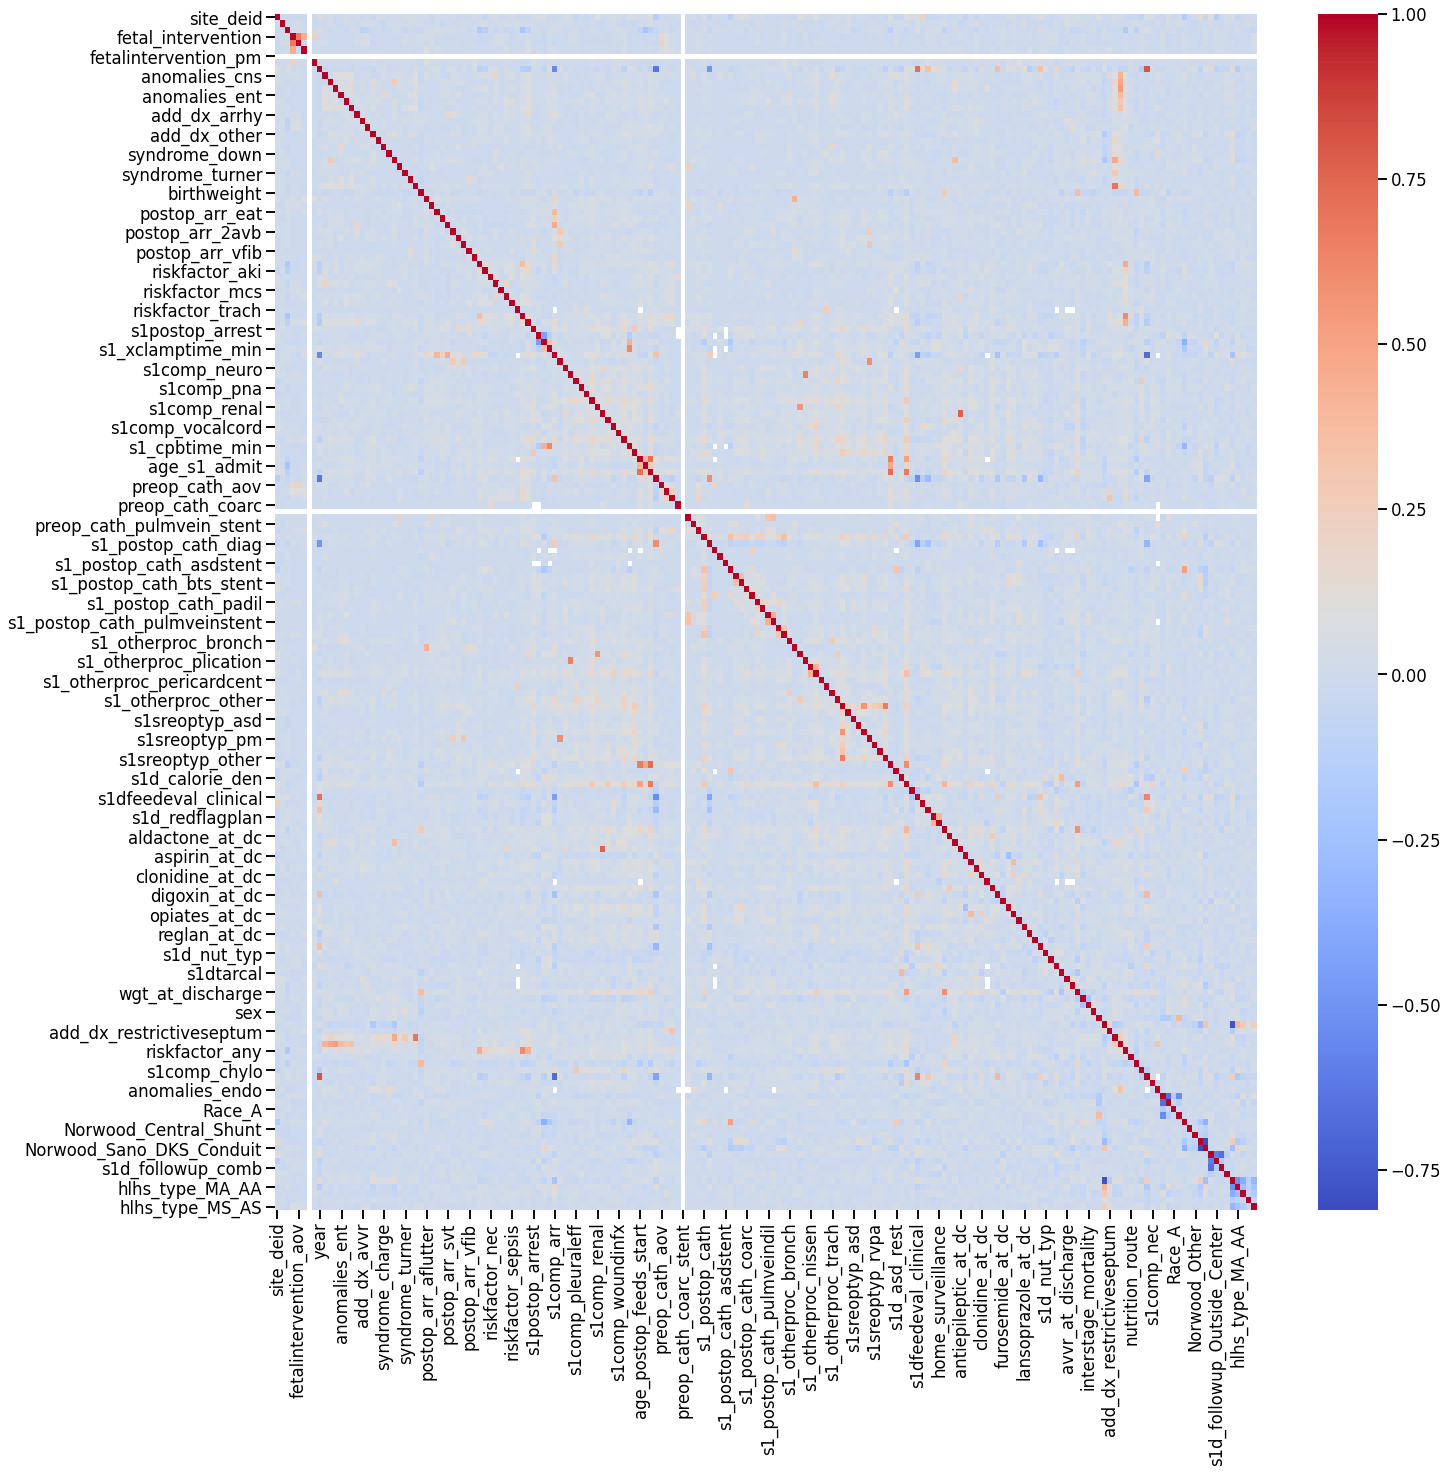

In [197]:
plt.figure(figsize=(22, 22))
sns_plot = sns.heatmap(df_new.corr(), cmap='coolwarm')
fig = sns_plot.get_figure()
# fig.savefig("figures/correlationPlot_with_missingness.png")

In [198]:
import numpy as np
#get absolute values
corr_matrix = df_new.corr().abs()
# print(corr_matrix)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                      k=1).astype(np.bool))
 # Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(); print(to_drop)


[]
